# Univariate Time Series
Univariate time series adalah serangkaian data yang direkam dalam interval waktu yang berurutan, di mana setiap titik data memiliki satu variabel yang diamati atau diukur. Ini berarti bahwa dalam analisis univariate time series, kita hanya memperhatikan satu variabel dalam rentang waktu tertentu.

Untuk latihan kali ini, kita akan menggunakan dataset cuaca kota Delhi pada tahun 2013 sampai 2017. Silakan unduh data tersebut pada tautan [Daily Climate Series](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data). Kita akan mengembangkan model yang dapat memprediksi cuaca dengan melanjutkan materi preprocessing.

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('./datasets/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
# Load dataset mandiri
data_train = pd.read_csv('./datasets/DailyDelhiClimateTrain.csv') #Tentukan Path atau lokasi penyimpanan dataset.
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
# mengecek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull().
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [10]:
# kita hanya akan menggunakan satu fitur yaitu meantemp dan date sebagai interval waktunya.
dates = df['date'].values
temp  = df['meantemp'].values

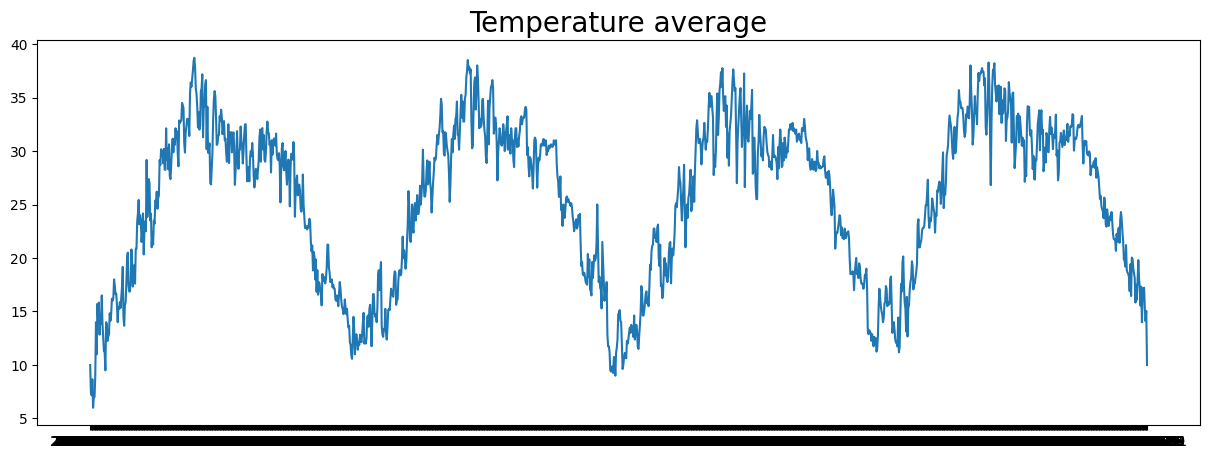

In [12]:
# kita akan membuat plot dari dataset dengan menggunakan fungsi plot dari library matplotlib.
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

Dapat dilihat dari output cell yang kita jalankan di atas menunjukkan bahwa data merupakan time series yang bersifat musiman karena memiliki pola yang berulang pada interval tertentu.

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Secara singkat fungsi di atas mengubah data kita menjadi format yang dapat diterima oleh model. Fungsi di atas menerima sebuah series/atribut kita yang telah dikonversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch. 

Selanjutnya untuk arsitektur model, gunakan dua buah layer LSTM. Ketika menggunakan dua buah layer LSTM atau lebih, perhatikan bahwa seluruh layer sebelum layer LSTM terakhir harus memiliki parameter return_sequences yang bernilai True.

In [14]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Lalu pada optimizer, kita akan menggunakan parameter learning rate dan momentum seperti di bawah. Kemudian salah satu loss function yang dapat dicoba untuk ini adalah Huber yang umum digunakan pada kasus time series. Selain itu, metrik yang digunakan untuk mengevaluasi model adalah MAE.

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 24.6277 - mae: 25.1277
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 24.0096 - mae: 24.5096

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 24.5753 - mae: 25.0753
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 24.1642 - mae: 24.6642
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 23.6651 - mae: 24.1651
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 23.4926 - mae: 23.9926
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 22.7138 - mae: 23.2138
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 21.9329 - mae: 22.4329
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 21.1743 - mae: 21.6743
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 20.0232 - mae: 20.5232
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 18.9740 - mae: 19.4740
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 17.0890 - mae: 17.5888
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 14.5789 - mae: 15.0744
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 11.3408 - mae: 11.8307
Epoch 14/100

Hasil dari pelatihan model adalah seperti di atas. Menunjukkan model memiliki MAE yang relatif rendah dibandingkan skala data.

Selanjutnya, kita dapat melakukan prediksi dengan menggunakan fungsi berikut.

In [16]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[31.21994 ],
       [13.610135],
       [26.579401],
       ...,
       [31.07058 ],
       [27.630156],
       [30.26419 ]], dtype=float32)